# Import Liberaries 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from imgaug import augmenters as iaa
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout,Conv2D,MaxPooling2D,GlobalAveragePooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Connect to My google drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data 

for files (images are grey scale 32x32x1)

One for training images,one for training label ,one for testing images and last for testing label 

In [ ]:
# Read Dataset
X_train= pd.read_csv('/content/drive/My Drive/TrainImages.csv')
y_train=pd.read_csv('/content/drive/My Drive/TrainLabel.csv')
X_test=pd.read_csv('/content/drive/My Drive/TestImages.csv')
y_test=pd.read_csv('/content/drive/My Drive/TestLabel.csv')

In [ ]:
print("Training Images Shape : ", X_train.shape)
print("Testing Images Shape : ",X_test.shape)

Training Images Shape :  (13439, 1024)
Testing Images Shape :  (3359, 1024)


In [ ]:
# Reshape Images 
X_train=X_train.iloc[:,:].values.reshape((13439,32, 32))
X_test=X_test.iloc[:,:].values.reshape((3359,32, 32))
y_train=y_train.iloc[:,:].values
y_test=y_test.iloc[:,:].values
y_train.shape

(13439, 1)

#Visualization 

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


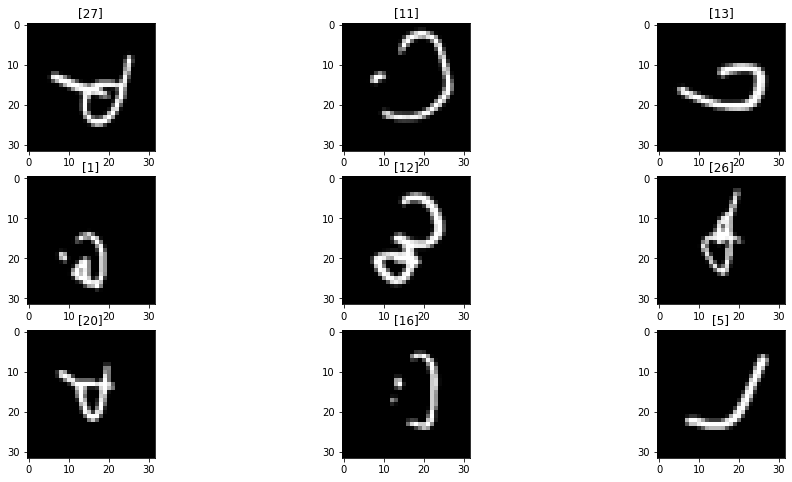

In [ ]:
plt.figure(figsize=(16,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[random.randint(0, 1000)],cmap='gray')
    plt.title(y_train[random.randint(0, 1000)])
plt.show()

# Data Augmentation 

Text(0.5, 1.0, 'Zoomed Image')

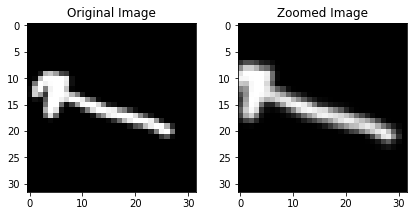

In [ ]:
#Zoom image

def zoom (image):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(image)
  return image 




#visualize  the agumenetd image
original_image = X_train[random.randint(0, 1000)].astype(np.uint8)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(6, 4))
fig.tight_layout()

axs[0].imshow(original_image,cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image,cmap='gray')
axs[1].set_title('Zoomed Image')




Text(0.5, 1.0, 'translated Image')

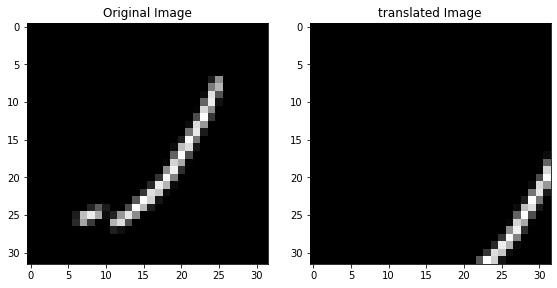

In [ ]:
#translated image
def translation(image):
    height, width = image.shape[:2]
    quarter_height, quarter_width = height/4, width/4
    T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])
    img_translation = cv2.warpAffine(image, T, (width, height))

    return img_translation



original_image = X_train[random.randint(0, 1000)].astype(np.uint8)
translated_image = translation(original_image)

fig, axs = plt.subplots(1, 2, figsize=(8, 6))
fig.tight_layout()

axs[0].imshow(original_image,cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(translated_image,cmap='gray')
axs[1].set_title('translated Image')




Text(0.5, 1.0, 'rotated_image Image')

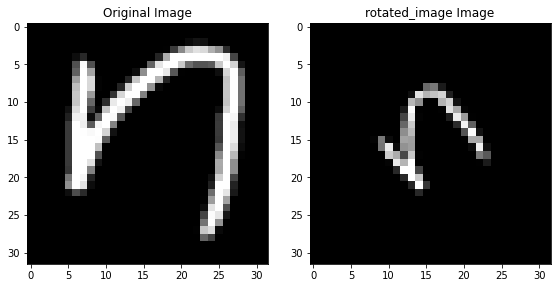

In [ ]:
#Rotate Image 
def rotation(image):
    height, width = image.shape[:2]
    rotation_list=[45,-45,90,-90]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), rotation_list[random.randint(0, len(rotation_list)-1)], .5)

    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    return rotated_image



original_image = X_train[random.randint(0, 1000)].astype(np.uint8)
rotated_image = rotation(original_image)

fig, axs = plt.subplots(1, 2, figsize=(8, 6))
fig.tight_layout()

axs[0].imshow(original_image,cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(rotated_image,cmap='gray')
axs[1].set_title('rotated_image Image')


Text(0.5, 1.0, 'flipped Image')

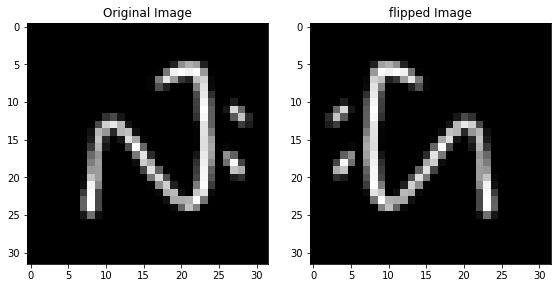

In [ ]:
#flip image 
def flip_vertical(image):
    flipped = cv2.flip(image, 1) # 1 vertical & 0 Horizntal
    return flipped



original_image = X_train[random.randint(0, 1000)].astype(np.uint8)
flipped_image = flip_vertical(original_image)

fig, axs = plt.subplots(1, 2, figsize=(8, 6))
fig.tight_layout()

axs[0].imshow(original_image,cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(flipped_image,cmap='gray')
axs[1].set_title('flipped Image')

Text(0.5, 1.0, 'flipped Image')

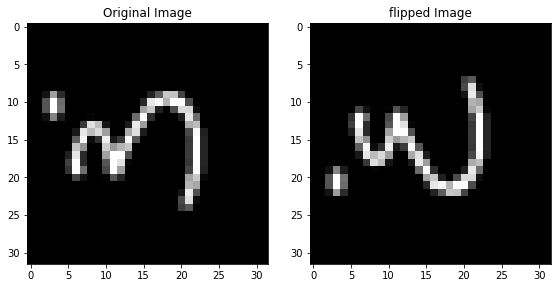

In [ ]:
#flip image 
def flip_Horizntal(image):
    flipped = cv2.flip(image, 0) # 1 vertical & 0 Horizntal
    return flipped



original_image = X_train[random.randint(0, 1000)].astype(np.uint8)
flipped_image = flip_Horizntal(original_image)

fig, axs = plt.subplots(1, 2, figsize=(8, 6))
fig.tight_layout()

axs[0].imshow(original_image,cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(flipped_image,cmap='gray')
axs[1].set_title('flipped Image')

In [ ]:
#Augmentation function 

def agumented_image(image,label):
  if np.random.rand()<0.5:
    image=rotation(image)
  if np.random.rand()<0.5:
    image=translation(image)
  if np.random.rand()<0.5:
    image=flip_vertical(image)
  if np.random.rand()<0.5:
    image=flip_Horizntal(image)
  return image,label

## Visualize  agumented images

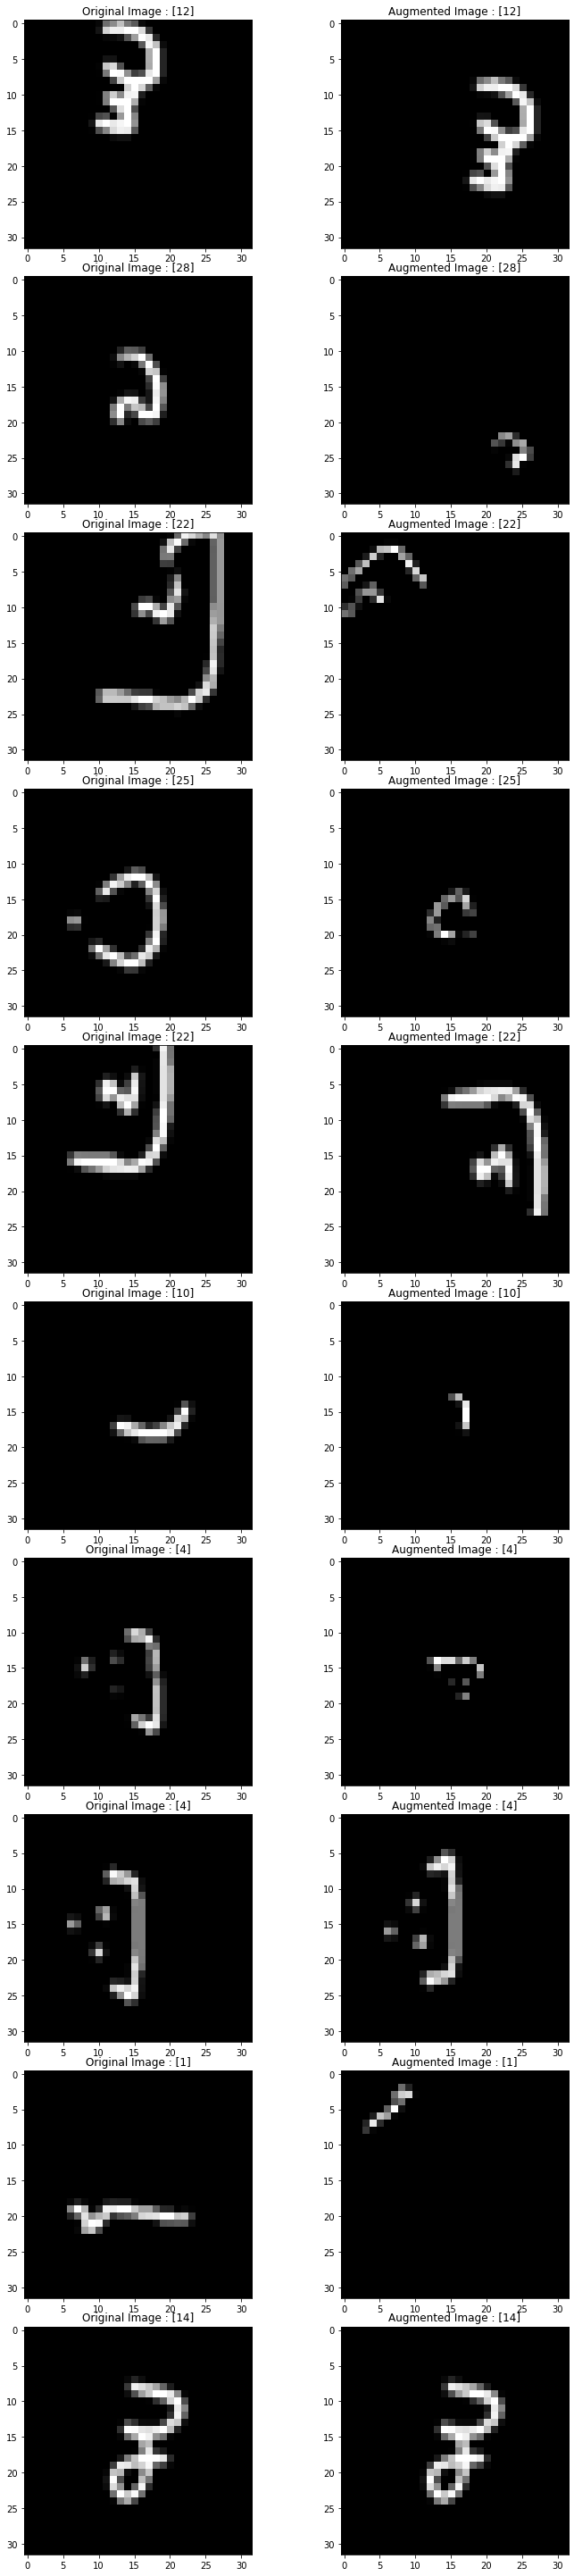

In [ ]:
#visualize the agumented images 
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(10, 40))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(X_train) - 1)
  original_image = X_train[randnum].astype(np.uint8)
    
  augmented_image, label = agumented_image(original_image,y_train[randnum])
    
  axs[i][0].imshow(original_image,cmap='gray')
  axs[i][0].set_title("Original Image : "+ str(label))
  
  axs[i][1].imshow(augmented_image,cmap='gray')
  axs[i][1].set_title("Augmented Image : " +str(label ))

In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32)), "The dimensions of the images are not 32x32"
assert(X_test.shape[1:] == (32,32)), "The dimensions of the images are not 32x32"


In [ ]:
print("y train shape :",y_train.shape)
print("y test shape : ",y_test.shape)


y train shape : (13439, 1)
y test shape :  (3359, 1)


Convert Shape of label 

In [ ]:
y_train=np.delete(to_categorical(y_train),0,1)
y_test=np.delete(to_categorical(y_test),0,1)


Normalizaton and reshape Images

In [ ]:
#normalizaton
X_train=X_train/255
X_test=X_test/255


X_train=X_train.reshape(X_train.shape[0],32,32,1)
X_test=X_test.reshape(X_test.shape[0],32,32,1)

print("Training Images Shape : ", X_train.shape)
print("Testing Images Shape : ",X_test.shape)

Training Images Shape :  (13439, 32, 32, 1)
Testing Images Shape :  (3359, 32, 32, 1)


### Function to preprocessing

In [ ]:
def image_preprocessing(image):

    image=image.astype(np.uint8)
    img=cv2.resize(image,(32,32))
    return img

Build Batch  generatot 

In [ ]:
def batch_generator (images,labels,batch_size,istraining):
  while True:
    batch_img = []
    batch_label = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(images) - 1)
      
      if istraining:
        image, label = agumented_image(images[random_index].astype(np.uint8), labels[random_index])
     
      else:
        image = images[random_index]
        label = labels[random_index]
      
      im = image_preprocessing(image)
      batch_img.append(im)
      batch_label.append(label)
    yield (np.array(batch_img), np.array(batch_label)) 
      


# Define Model 

Use Architecture from : https://github.com/AmrHendy/Arabic-Handwritten-Images-Recognition/blob/master/Arabic_Handwritten_R and do some modification 

In [ ]:
num_classes=28

def create_model():
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer='uniform', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='uniform', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='uniform', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='uniform', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(num_classes, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model

In [ ]:
model=create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)      

Train Model 

In [ ]:
history =model.fit_generator(batch_generator(X_train, y_train, 128, 1),
                                  steps_per_epoch=84, 
                                  epochs=15,
                                  validation_data=batch_generator(X_train, y_train, 32, 0),
                                  verbose=1,
                                  shuffle = 1)


Epoch 1/15
84/84 [==============================] - 2s 14ms/step - loss: 2.4908 - accuracy: 0.2598 - val_loss: 1.9186 - val_accuracy: 0.4394
Epoch 2/15
84/84 [==============================] - 1s 10ms/step - loss: 1.5657 - accuracy: 0.5011 - val_loss: 1.2397 - val_accuracy: 0.6109
Epoch 3/15
84/84 [==============================] - 1s 10ms/step - loss: 1.0644 - accuracy: 0.6464 - val_loss: 0.8868 - val_accuracy: 0.7254
Epoch 4/15
84/84 [==============================] - 1s 11ms/step - loss: 0.7771 - accuracy: 0.7397 - val_loss: 0.7116 - val_accuracy: 0.7693
Epoch 5/15
84/84 [==============================] - 1s 11ms/step - loss: 0.6114 - accuracy: 0.7935 - val_loss: 0.6054 - val_accuracy: 0.7969
Epoch 6/15
84/84 [==============================] - 1s 9ms/step - loss: 0.4998 - accuracy: 0.8328 - val_loss: 0.5614 - val_accuracy: 0.8222
Epoch 7/15
84/84 [==============================] - 1s 10ms/step - loss: 0.4314 - accuracy: 0.8511 - val_loss: 0.5063 - val_accuracy: 0.8415
Epoch 8/15
84/

### Visualize Loss and Accuarcy 

Text(0.5, 0, 'epochs')

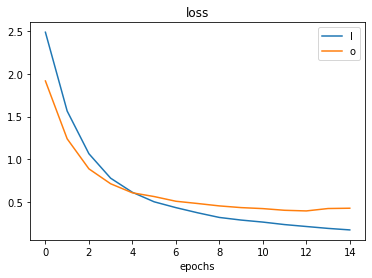

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

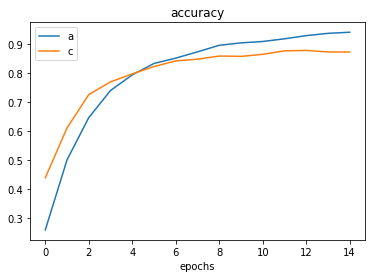

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend('accuracy')
plt.xlabel('epochs')

### evaluate the model 

In [ ]:
score =model.evaluate(X_test,y_test)
print('Test score ' ,score[0])
print('Test accuracy ', score[1])

105/105 [==============================] - 1s 5ms/step - loss: 56.6563 - accuracy: 0.9092
Test score  56.656288146972656
Test accuracy  0.9091991782188416


### Save Model

In [ ]:
model.save('/content/drive/My Drive/COELIA/Ar_ch_model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/COELIA/Ar_ch_model.h5')

In [ ]:
score =model.evaluate(X_test,y_test)
print('Test score ' ,score[0])
print('Test accuracy ', score[1])

105/105 [==============================] - 1s 5ms/step - loss: 56.6563 - accuracy: 0.9092
Test score  56.656288146972656
Test accuracy  0.9091991782188416


# Make Prediction 

In [ ]:
# Define List of charcters 
result=[u'أ',u'ب',u'ت',u'ث',u'ج',u'ح',u'خ',u'د',u'ذ',u'ر',u'ز',u'س',u'ش',u'ص',u'ض'u'ط',u'ظ',u'ع',u'غ',u'ف',u'ق',
        u'ك',u'ل',u'م',u'ن',u'ه',u'و',u'ي']

Text(0.5, 1.0, 'أ')

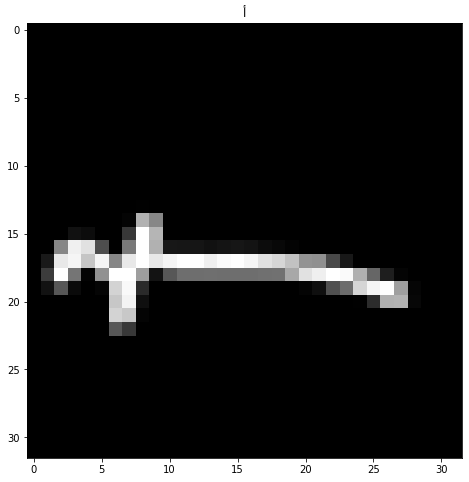

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(X_test[0].reshape(32,32),cmap='gray')
plt.title(result[y_test[0].argmax(axis=0)])

In [ ]:
print("Acual value : ",result[y_test[0].argmax(axis=0)]," and prediction : " , result[model.predict(X_test[0].reshape(-1,32,32,1)).argmax(axis=1)[0]])

Acual value :  أ  and prediction :  أ


Text(0.5, 1.0, 'ب')

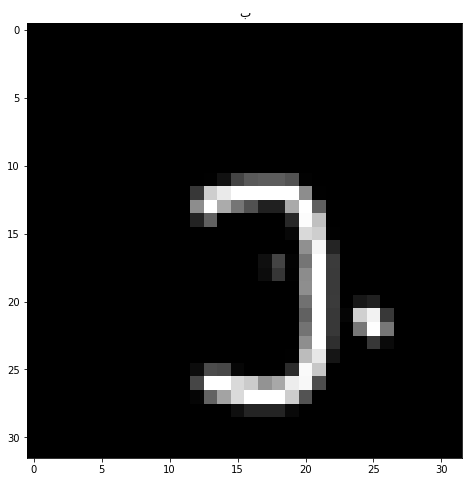

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(X_test[2].reshape(32,32,),cmap='gray')
plt.title(result[y_test[2].argmax(axis=0)])

In [ ]:
print("Acual value : ",result[y_test[2].argmax(axis=0)]," and prediction : " , result[model.predict(X_test[2].reshape(-1,32,32,1)).argmax(axis=1)[0]])

Acual value :  ب  and prediction :  ب


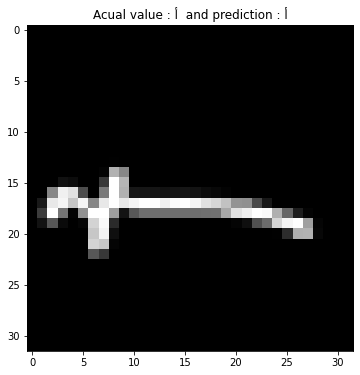

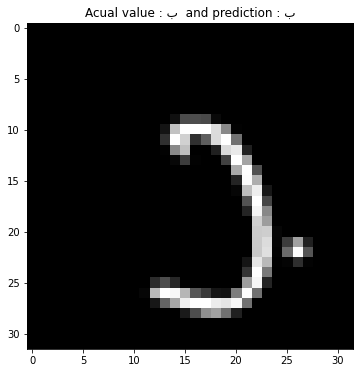

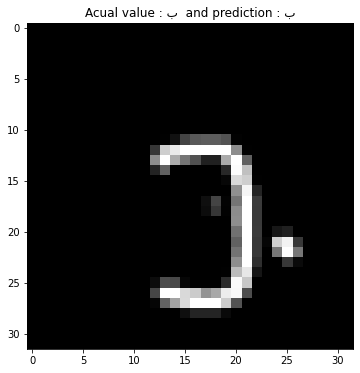

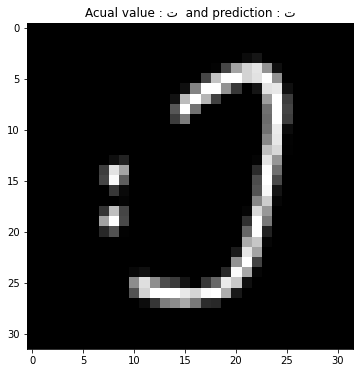

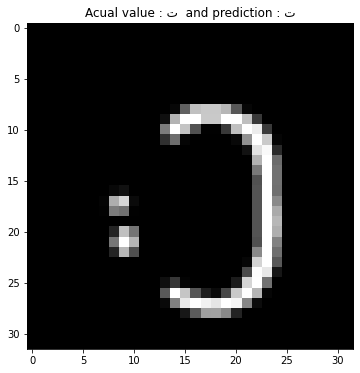

In [ ]:
for i in range(5):
    plt.figure(figsize=(8,6))
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    plt.title("Acual value : {}  and prediction : {}".format(result[y_test[i].argmax(axis=0)], result[model.predict(X_test[i].reshape(-1,32,32,1)).argmax(axis=1)[0]]))

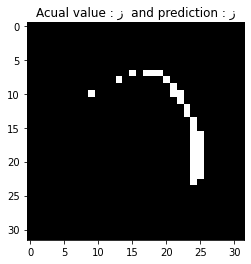

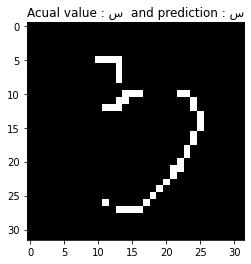

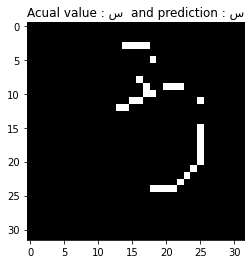

In [ ]:
for i in range(20,23):
    plt.figure(figsize=(6,4))
    plt.imshow(flip_Horizntal(X_test[i].reshape(32,32).astype(np.uint8)),cmap='gray')
    plt.title("Acual value : {}  and prediction : {}".format(result[y_test[i].argmax(axis=0)], result[model.predict(X_test[i].reshape(-1,32,32,1)).argmax(axis=1)[0]]))

Method To Make Prediction 

In [ ]:
def make_prediction(image):
    if image.ndim==3 and image.shape[2]==1 or image.ndim==2 :
        image=cv2.resize(image,(32,32))
        image=image/255
        image=image.reshape(-1,32,32,1)
        print("Prediction :  " ,result[model.predict(image).argmax(axis=1)[0]])
    else:
        image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image=cv2.resize(image,(32,32))
        image=image/255
        image=image.reshape(-1,32,32,1)
        print("Prediction :  " ,result[model.predict(image).argmax(axis=1)[0]])

make_prediction(X_test[0])

Prediction :   أ


In [ ]:
make_prediction(X_test[0].reshape(32,32,1))

Prediction :   أ


Method Take image as input

In [ ]:
def predict_charcter_in_image(image):
    image=cv2.imread(image,0) # 0 in flage to convert image to gray scale 
    image=cv2.resize(image,(32,32))
    image=image/255
    image=image.reshape(-1,32,32,1)
    print("Prediction :  " ,result[model.predict(image).argmax(axis=1)[0]])